# **📊 Spam Detection Using Multiple Machine Learning Models**

**Prepared by: Syeda Alishba Fatima
Student ID: DS-251-126**

In [1]:
import pandas as pd

# Step 1: Load Excel file
df = pd.read_excel('/content/dataset.xlsx')

# 2. Keep only the first two columns
df = df.iloc[:, :2]

# 3. Rename columns
df.columns = ["label", "message"]

# 4. Drop any rows with missing label or message
df = df.dropna()

# 5. Check your cleaned data
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns.')

df.head()




The data set has 5232 rows and 2 columns.


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**✅ Step 2: Preprocess the Text**

We'll remove punctuation, lowercase, remove stopwords, and stem the words.

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = str(text)  # 🔒 Convert anything to string safely
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # keep numbers
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_message'] = df['message'].apply(preprocess)
df[['label', 'clean_message']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,clean_message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


In [3]:
extra_spam = [
    "Congratulations! You've won a $1000 Walmart gift card. Call now!",
    "Claim your $5000 reward by calling us now!",
    "You have been selected to receive a free Walmart gift card!",
    "WIN BIG MONEY NOW — Text WIN to 90099",
    "Free prize! Click to claim your reward."
]

extra_data = pd.DataFrame({
    'label': ['spam'] * len(extra_spam),
    'message': extra_spam
})

# Preprocess
extra_data['clean_message'] = extra_data['message'].apply(preprocess)

# Combine with original
df = pd.concat([df, extra_data], ignore_index=True)


# **TF-IDF Vectorization + Label Encoding**

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])  # spam=1, ham=0


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])  # spam=1, ham=0


**✅ Step 3: Convert Text to Numbers (Vectorization)**

We’ll use Bag of Words (CountVectorizer).

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])


✅ Step 4: Encode Labels (ham → 0, spam → 1)

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])  # 'spam' → 1, 'ham' → 0


✅ Step 5: Split the Data into Training and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



✅ Step 6: 📦  Import All Models and Metrics

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



✅ Step 7: Train and Evaluate the Model

In [8]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:17:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
2,SVM (Linear),0.9752,0.9615,0.8562,0.9058
3,Random Forest,0.9742,0.9837,0.8288,0.8996
5,XGBoost,0.9714,0.9265,0.8630,0.8936
0,Naive Bayes,0.9618,1.0000,0.7260,0.8413
1,Logistic Regression,0.9485,0.9694,0.6507,0.7787
4,KNN,0.8989,1.0000,0.2740,0.4301


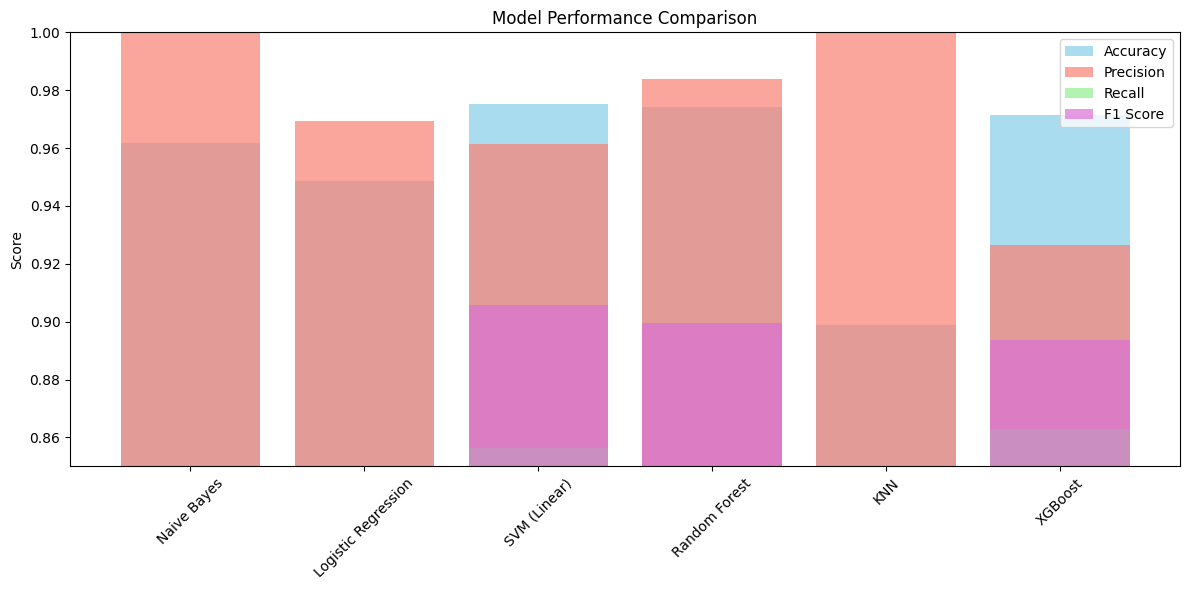

In [10]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'salmon', 'lightgreen', 'orchid']

for i, metric in enumerate(metrics):
    plt.bar(
        [model["Model"] for model in results],
        [model[metric] for model in results],
        label=metric,
        color=colors[i],
        alpha=0.7
    )

# Customize the plot
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0.85, 1.00)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
def predict_message(text, model_to_use):
    cleaned = preprocess(text)
    vect = vectorizer.transform([cleaned])
    pred = model_to_use.predict(vect)
    return "Spam" if pred[0] == 1 else "Ham"


In [13]:
predict_message("Congratulations! You've won a $1000 Walmart gift card. Call now!", model_to_use=models["SVM (Linear)"])




'Spam'

# **Test Messages (Spam + Ham)**




In [14]:
test_messages = [
    # SPAM
    "Congratulations! You've won a $1000 Walmart gift card. Call now!",
    "WINNER! You have been selected for a free iPhone. Click the link to claim.",
    "URGENT! Your subscription is expiring. Call 800-333-4444 now to renew.",
    "You have won $5000 cash. Reply WIN to claim your prize!",
    "Claim your FREE trial now! Limited time offer. Don’t miss out.",

    # HAM
    "Hey, are we still meeting for lunch today at 1?",
    "Can you please send me the report before evening?",
    "I'm running a bit late, see you in 10 minutes.",
    "Let’s go for a walk after dinner.",
    "Your order has been shipped and will arrive tomorrow."
]


# **✅ Step 2: Predict with All Models**

In [22]:
def predict_message(text, model_to_use):
    cleaned = preprocess(text)
    vect = vectorizer.transform([cleaned])
    pred = model_to_use.predict(vect)
    return "Spam" if pred[0] == 1 else "Ham"

# Predict with each model
for msg in test_messages:
    print(f"\n📨 Message: {msg}")
    for name, model in models.items():
        prediction = predict_message(msg, model)
        print(f"{name:<20}: {prediction}")



📨 Message: Congratulations! You've won a $1000 Walmart gift card. Call now!
Naive Bayes         : Spam
Logistic Regression : Ham
SVM (Linear)        : Spam
Random Forest       : Spam
KNN                 : Ham
XGBoost             : Spam

📨 Message: WINNER! You have been selected for a free iPhone. Click the link to claim.
Naive Bayes         : Spam
Logistic Regression : Spam
SVM (Linear)        : Spam
Random Forest       : Spam
KNN                 : Ham
XGBoost             : Spam

📨 Message: URGENT! Your subscription is expiring. Call 800-333-4444 now to renew.
Naive Bayes         : Spam
Logistic Regression : Spam
SVM (Linear)        : Spam
Random Forest       : Ham
KNN                 : Ham
XGBoost             : Ham

📨 Message: You have won $5000 cash. Reply WIN to claim your prize!
Naive Bayes         : Spam
Logistic Regression : Spam
SVM (Linear)        : Spam
Random Forest       : Spam
KNN                 : Ham
XGBoost             : Spam

📨 Message: Claim your FREE trial now! Limit

In [23]:
import pandas as pd

# Store all predictions
comparison_data = []

for msg in test_messages:
    row = {"Message": msg}
    for name, model in models.items():
        prediction = predict_message(msg, model)
        row[name] = prediction
    comparison_data.append(row)

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Message,Naive Bayes,Logistic Regression,SVM (Linear),Random Forest,KNN,XGBoost
0,Congratulations! You've won a $1000 Walmart gi...,Spam,Ham,Spam,Spam,Ham,Spam
1,WINNER! You have been selected for a free iPho...,Spam,Spam,Spam,Spam,Ham,Spam
2,URGENT! Your subscription is expiring. Call 80...,Spam,Spam,Spam,Ham,Ham,Ham
3,You have won $5000 cash. Reply WIN to claim yo...,Spam,Spam,Spam,Spam,Ham,Spam
4,Claim your FREE trial now! Limited time offer....,Ham,Ham,Spam,Spam,Ham,Ham
5,"Hey, are we still meeting for lunch today at 1?",Ham,Ham,Ham,Ham,Ham,Ham
6,Can you please send me the report before evening?,Ham,Ham,Ham,Ham,Ham,Ham
7,"I'm running a bit late, see you in 10 minutes.",Ham,Ham,Ham,Ham,Ham,Ham
8,Let’s go for a walk after dinner.,Ham,Ham,Ham,Ham,Ham,Ham
9,Your order has been shipped and will arrive to...,Ham,Ham,Ham,Ham,Ham,Ham


In [25]:
# Convert to numeric: Spam=1, Ham=0
numeric_df = comparison_df.copy()
for col in models.keys():
    numeric_df[col] = numeric_df[col].map({'Ham': 0, 'Spam': 1})


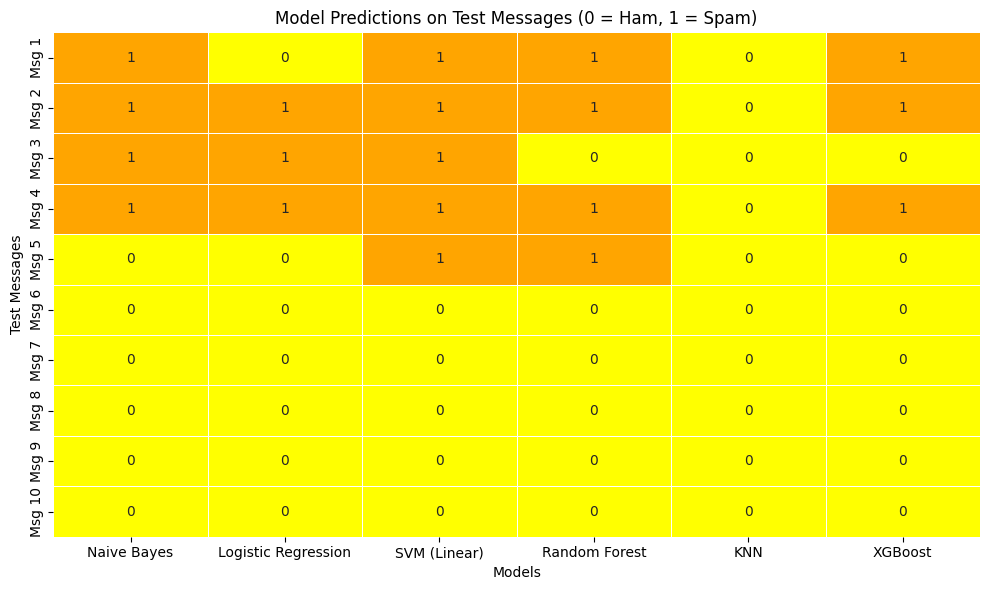

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df[models.keys()],
    annot=True,
    cbar=False,
    cmap=["yellow", "orange"],
    linewidths=0.5,
    xticklabels=True,
    yticklabels=[f"Msg {i+1}" for i in range(len(numeric_df))]
)

plt.title("Model Predictions on Test Messages (0 = Ham, 1 = Spam)")
plt.xlabel("Models")
plt.ylabel("Test Messages")
plt.tight_layout()
plt.show()


**MAKING TABLE FOR RIGHT AND WRONG PREDICTIONS OF TEST MESAGE BY THE MODELS**

In [37]:
test_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Call now!",
    "WINNER! You have been selected for a free iPhone. Click the link to claim.",
    "URGENT! Your subscription is expiring. Call 800-333-4444 now to renew.",
    "You have won $5000 cash. Reply WIN to claim your prize!",
    "Claim your FREE trial now! Limited time offer. Don’t miss out.",
    "Hey, are we still meeting for lunch today at 1?",
    "Can you please send me the report before evening?",
    "I'm running a bit late, see you in 10 minutes.",
    "Let’s go for a walk after dinner.",
    "Your order has been shipped and will arrive tomorrow."
]

true_labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1 = Spam, 0 = Ham


In [38]:
def predict_label(text, model):
    processed = preprocess(text)
    vectorized = vectorizer.transform([processed])
    return model.predict(vectorized)[0]

# Build predictions table
import pandas as pd

comparison_df = pd.DataFrame({"Message": test_messages})
for name, model in models.items():
    preds = [predict_label(msg, model) for msg in test_messages]
    preds = ["Spam" if p == 1 else "Ham" for p in preds]
    comparison_df[name] = preds


In [39]:
label_map = {"Ham": 0, "Spam": 1}
model_cols = list(models.keys())

# Build correctness color map
correctness_colors = []
for i in range(len(comparison_df)):
    msg_colors = []
    true = true_labels[i]
    for model in model_cols:
        pred = label_map[comparison_df.at[i, model]]
        color = "lightgreen" if pred == true else "salmon"
        msg_colors.append(color)
    correctness_colors.append(msg_colors)


/tmp/ipython-input-310187421.py:34: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-310187421.py:34: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


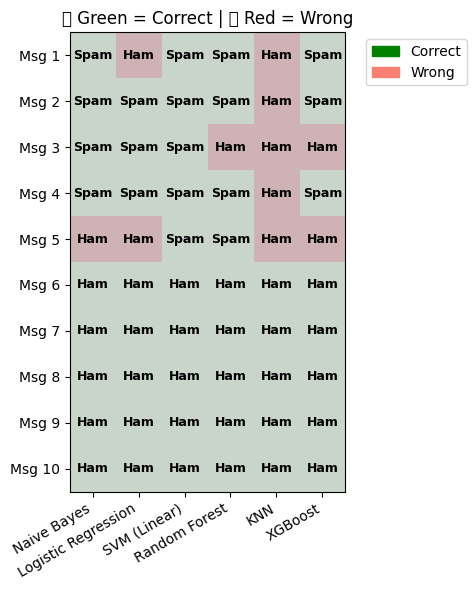

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare prediction values and correctness flags
pred_texts = comparison_df[model_cols].values
pred_bools = np.array([[label_map[pred] == true_labels[i] for pred in row]
                       for i, row in enumerate(pred_texts)])

# Step 2: Convert correctness to color values
color_matrix = np.where(pred_bools, "lightgreen", "salmon")

# Step 3: Plot manually
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(color_matrix == "lightgreen", cmap="Greens", alpha=0.3)
ax.imshow(color_matrix == "salmon", cmap="Reds", alpha=0.3)

# Annotate each cell with Spam/Ham text
for i in range(pred_texts.shape[0]):
    for j in range(pred_texts.shape[1]):
        ax.text(j, i, pred_texts[i, j], ha="center", va="center", fontsize=9, fontweight='bold')

# Set axes
ax.set_xticks(np.arange(len(model_cols)))
ax.set_xticklabels(model_cols, rotation=30, ha="right")
ax.set_yticks(np.arange(len(test_messages)))
ax.set_yticklabels([f"Msg {i+1}" for i in range(len(test_messages))])

# Legend
green_patch = plt.matplotlib.patches.Patch(color='green', label='Correct')
red_patch = plt.matplotlib.patches.Patch(color='salmon', label='Wrong')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("🟩 Green = Correct | 🔴 Red = Wrong")
plt.tight_layout()
plt.show()
